In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/serrabayraktar/Desktop/Newdataset210 - Sheet1 (1).csv')

df.head()



,People,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Female,18-24,Instagram,Normally,Yes,Very often,Yes,3,I follow influencers and celebrities,Normally
1,2,Female,18-24,Instagram,Normally,Yes,Very often,Yes,4,I follow some influencers,Normally
2,3,Male,18-24,Instagram,Always,Yes,Sometimes,Yes,2,I follow influencers and celebrities,Occasionally
3,4,Female,18-24,Instagram,Always,Yes,Very often,No,3,I do not follow influencer or celebrities,Occasionally
4,5,Female,18-24,Pinterest,Normally,Yes,Sometimes,Yes,1,I follow influencers and celebrities,Normally


In [610]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 50 rows and 11 columns.


In [611]:
print(df.columns)

Index(['People', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   People  50 non-null     int64 
 1   Q1      50 non-null     object
 2   Q2      50 non-null     object
 3   Q3      50 non-null     object
 4   Q4      50 non-null     object
 5   Q5      50 non-null     object
 6   Q6      50 non-null     object
 7   Q7      50 non-null     object
 8   Q8      50 non-null     int64 
 9   Q9      50 non-null     object
 10  Q10     50 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.4+ KB


In [613]:

df.describe()

,People,Q8
count,50.00000,50.00000
mean,25.50000,3.50000
std,14.57738,1.19949
min,1.00000,1.00000
25%,13.25000,3.00000
50%,25.50000,4.00000
75%,37.75000,4.00000
max,50.00000,5.00000


In [614]:
print(df.columns)

Index(['People', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


In [615]:
import pandas as pd

scale_mapping = {
    'Never': 1,
    'Occasionally': 2,
    'Sometimes': 3,
    'Normally': 4,
    'Always': 5
}

binary_mapping = {
    'Yes': 1,
    'No': 0
}

sex_map = {'Female':1, 'Male': 0}

df['Q1'] = df['Q1'].map(sex_map)
df['Q4'] = df['Q4'].map(scale_mapping)
df['Q10'] = df['Q10'].map(scale_mapping)
df['Q6'] = df['Q6'].map(scale_mapping)
df['Q5'] = df['Q5'].map(binary_mapping)
df['Q7'] = df['Q7'].map(binary_mapping)

print(df.head())

   People  Q1     Q2         Q3  Q4  Q5   Q6  Q7  Q8  \
0       1   1  18-24  Instagram   4   1  NaN   1   3   
1       2   1  18-24  Instagram   4   1  NaN   1   4   
2       3   0  18-24  Instagram   5   1  3.0   1   2   
3       4   1  18-24  Instagram   5   1  NaN   0   3   
4       5   1  18-24  Pinterest   4   1  3.0   1   1   

                                          Q9  Q10  
0       I follow influencers and celebrities    4  
1                  I follow some influencers    4  
2       I follow influencers and celebrities    2  
3  I do not follow influencer or celebrities    2  
4       I follow influencers and celebrities    4  


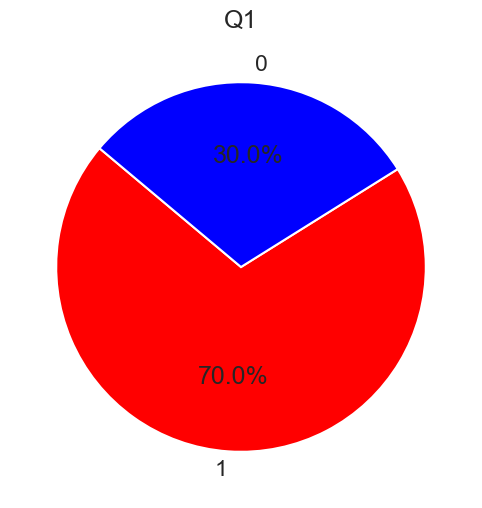

In [616]:
import matplotlib.pyplot as plt
import pandas as pd

gender_counts = df['Q1'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Q1')
plt.show()

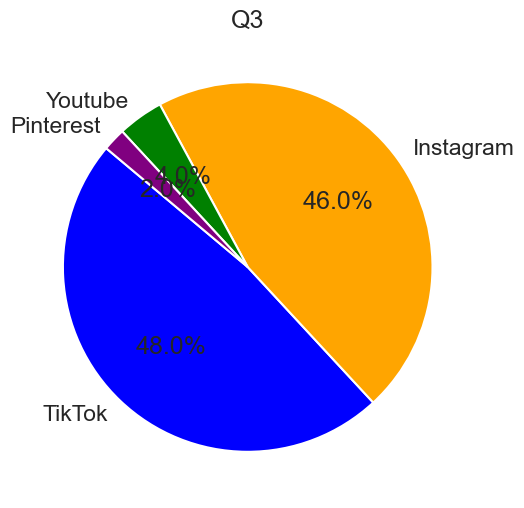

In [617]:
import matplotlib.pyplot as plt
import pandas as pd

platform_counts = df['Q3'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'purple', 'yellow'])
plt.title('Q3')
plt.show()


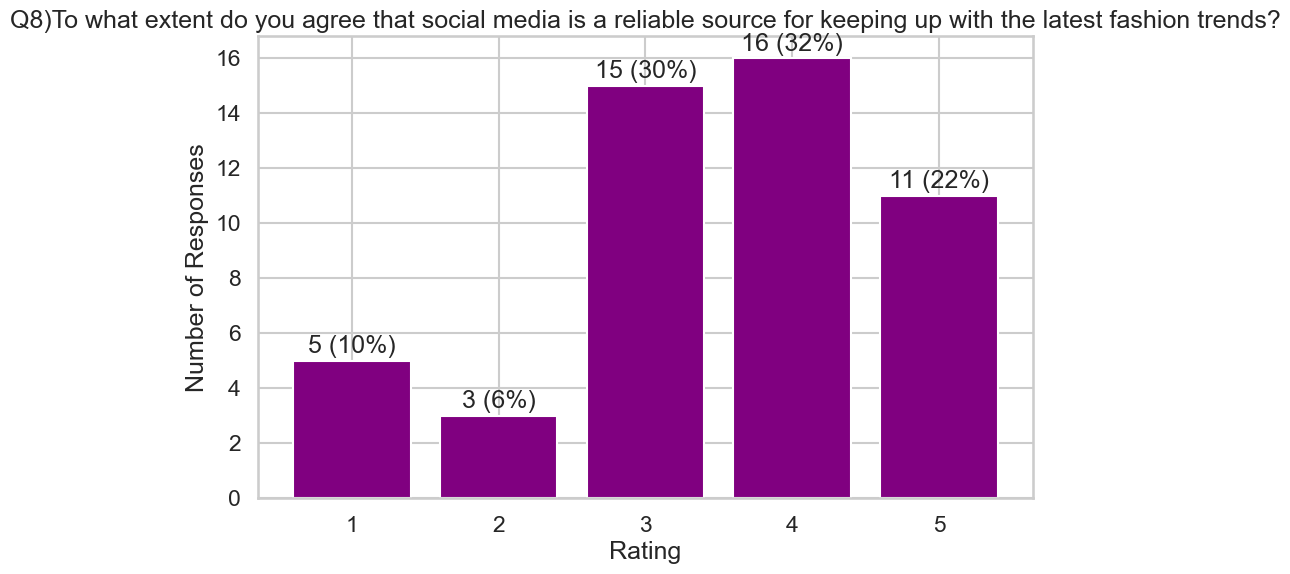

In [618]:
import matplotlib.pyplot as plt
import pandas as pd
response_counts = df['Q8'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(response_counts.index, response_counts.values, color='purple')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval} ({yval/sum(response_counts.values)*100:.0f}%)', ha='center', va='bottom')

plt.title('Q8)To what extent do you agree that social media is a reliable source for keeping up with the latest fashion trends?')
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.xticks(response_counts.index)
plt.show()

In [619]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Q3_encoded'] = encoder.fit_transform(df['Q3'])

df['Q7_numeric'] = df['Q7'].apply(lambda x: 1 if x == 'Yes' else 0)

X = df[['Q3_encoded']]
y = df['Q7_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix:
 [[10]]


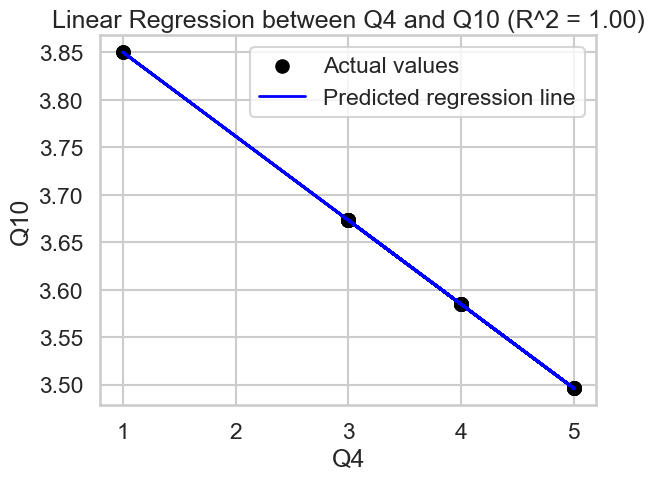

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Q4']], df['Q10'])
df['Q10'] = model.predict(df[['Q4']])
r2 = model.score(df[['Q4']], df['Q10'])
plt.scatter(df['Q4'], df['Q10'], color='black', label='Actual values')
plt.plot(df['Q4'], df['Q10'], color='blue', linewidth=2, label='Predicted regression line')

plt.xlabel('Q4')
plt.ylabel('Q10')
plt.title(f'Linear Regression between Q4 and Q10 (R^2 = {r2:.2f})')
plt.legend()
plt.show()

In [621]:
df = df.drop(['Q1','Q3','Q2','Q9'], axis=1)
df.head()
df.dropna

,People,Q4,Q5,Q6,Q7,Q8,Q10,Q3_encoded,Q7_numeric
0,1,4,1,NaN,1,3,3.584615,0,0
1,2,4,1,NaN,1,4,3.584615,0,0
2,3,5,1,3.0,1,2,3.496154,0,0
3,4,5,1,NaN,0,3,3.496154,0,0
4,5,4,1,3.0,1,1,3.584615,1,0


In [623]:

X = df.drop('Q7',axis=1)  
y = df['Q7']    # Etiketler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [638]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X, y)

y_train_pred = model.predict(X)
train_mse = mean_squared_error(y, y_train_pred)
train_r2 = r2_score(y, y_train_pred)

print(f"MSE: {train_mse}")
print(f"R^2: {train_r2}")

MSE: 0.08839141846715719
R^2: 0.10503688802003364


In [624]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_leaf_nodes': [3 , 7],
    'min_samples_split': [20 , 50]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X,y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_accuracy = grid_search.best_score_
print("Validation accuracy with best hyperparameters:", best_accuracy)

Best hyperparameters: {'max_leaf_nodes': 3, 'min_samples_split': 50}
Validation accuracy with best hyperparameters: 0.8933333333333333


In [627]:

from sklearn.metrics import accuracy_score
y_pred = best_dtree.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'The classification accuracy of the decision tree on the test set is: {accuracy}')

The classification accuracy of the decision tree on the test set is: 0.8888888888888888


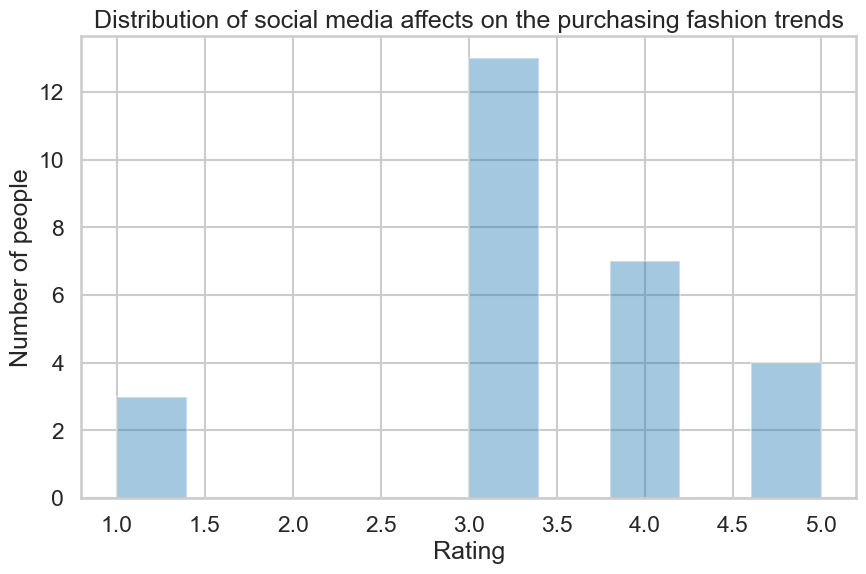

In [628]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
sns.distplot(df['Q4'], kde=False, bins=10)
plt.title('Distribution of social media affects on the purchasing fashion trends')
plt.xlabel('Rating')
plt.ylabel('Number of people')
plt.show()

Q7            1.000000e+00
People        2.984885e-01
Q8            1.936492e-01
Q3_encoded    1.578340e-01
Q10           1.188788e-16
Q4            7.211110e-17
Q5                     NaN
Q6                     NaN
Q7_numeric             NaN
Name: Q7, dtype: float64


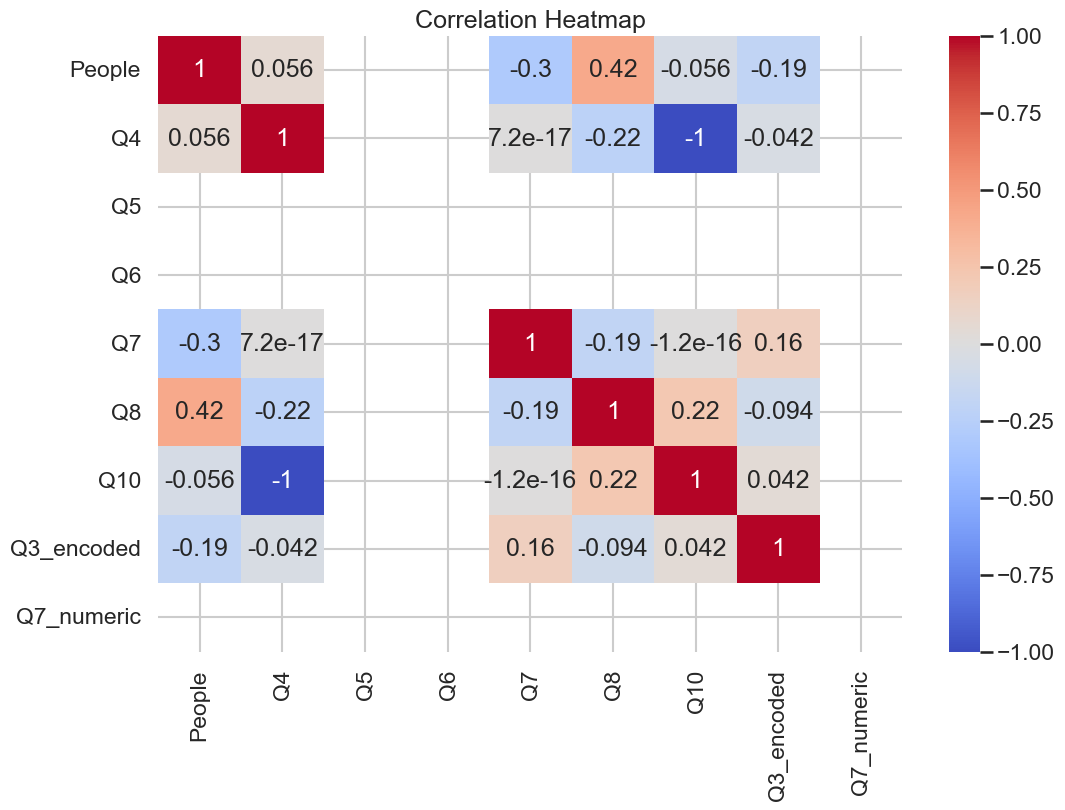

In [629]:
correlation_matrix = df.corr()
health_correlations = correlation_matrix['Q7'].abs().sort_values(ascending=False)
print(health_correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()